In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load Dataset - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [2]:

bank = pd.read_csv('../input/bank-additional-full.csv', sep = ';')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Convert dependent variable 'y' categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [4]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1 Categorical Treatment

In [6]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [7]:
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


# Age 

In [8]:
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


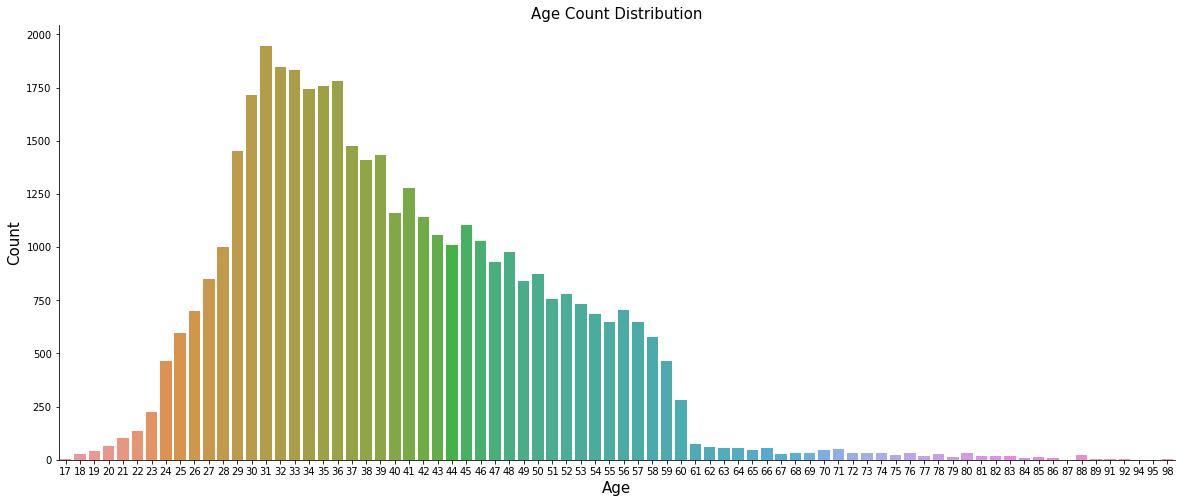

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

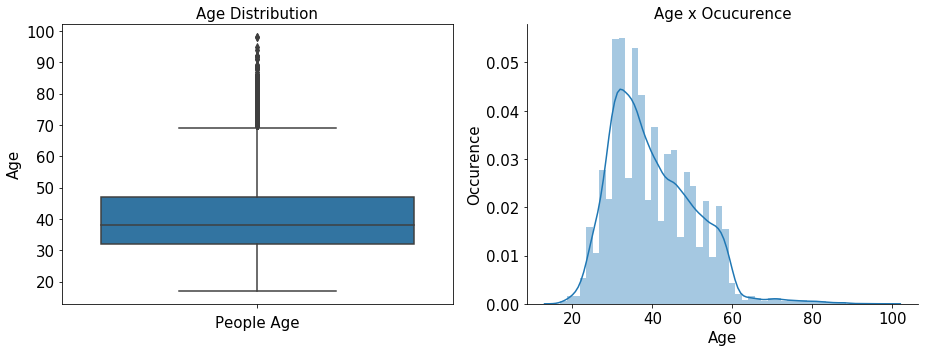

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

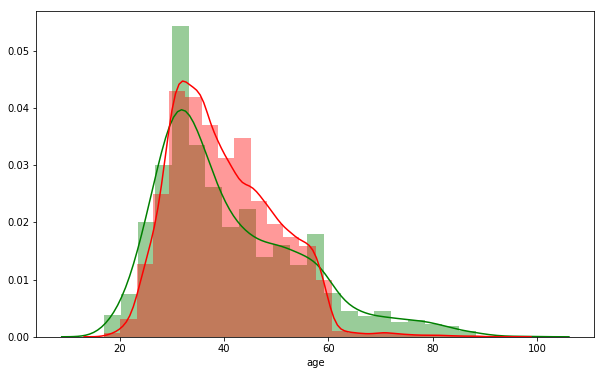

In [11]:
age_target_yes = bank[(bank['age'] > 0) & (bank['y'] == 'yes')]
age_target_no = bank[(bank['age'] > 0) & (bank['y'] == 'no')]

plt.figure(figsize=(10, 6))
sns.distplot(age_target_yes['age'], bins=25, color='g')
sns.distplot(age_target_no['age'], bins=25, color='r')
plt.show()

In [12]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [13]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


# Jobs

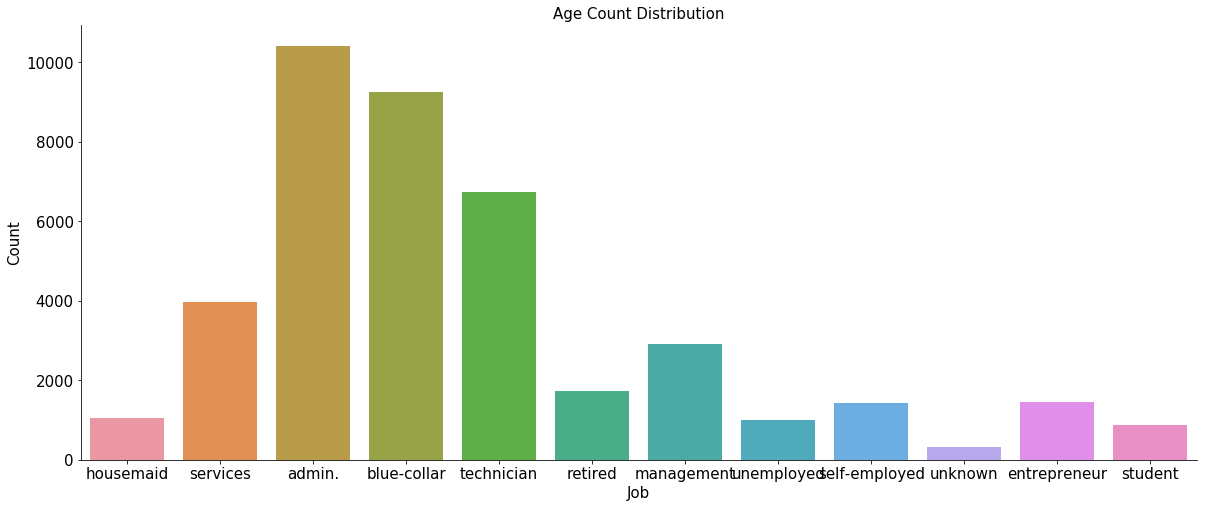

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Marital

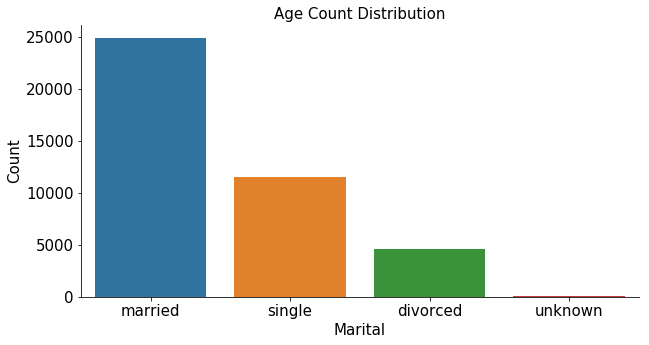

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# EDUCATION

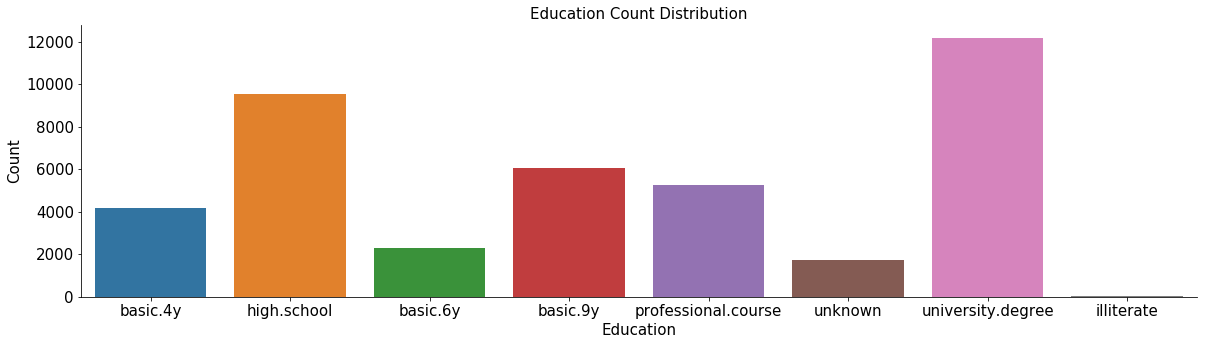

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# DEFAULT, HOUSING, LOAN

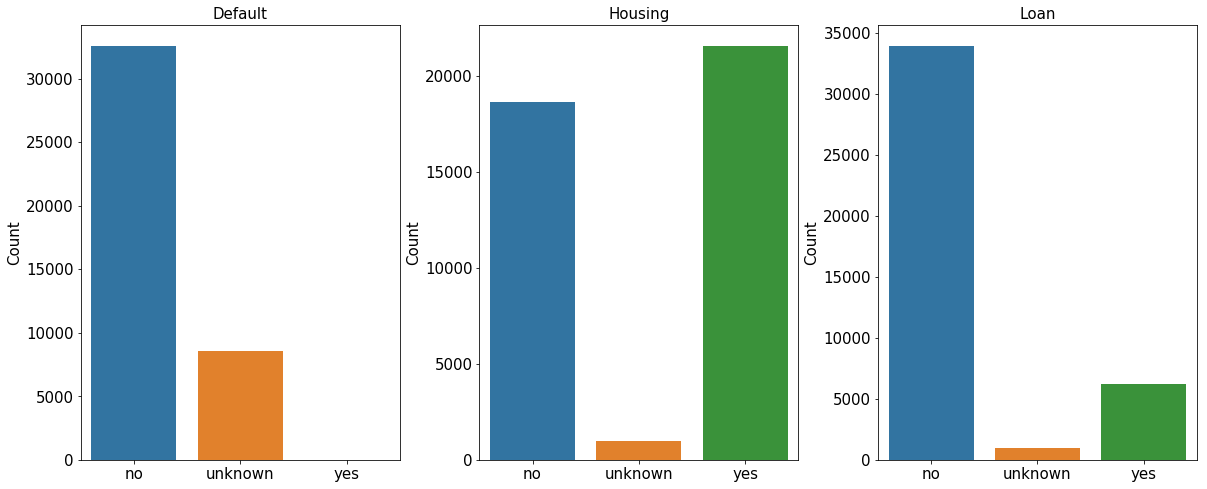

In [17]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [18]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [19]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [20]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


 Converting Jobs, Marital, Education, Default, Housing, Loan. to continuous due the feature scaling will be applied later

In [21]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [22]:
#create group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [23]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


# 2 current campaign

In [24]:
bank_campaign = bank.iloc[: , 7:11]
bank_campaign.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [25]:
bank_campaign.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [26]:
print("Kind of Contact: \n", bank_campaign['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_campaign['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_campaign['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


# Duration

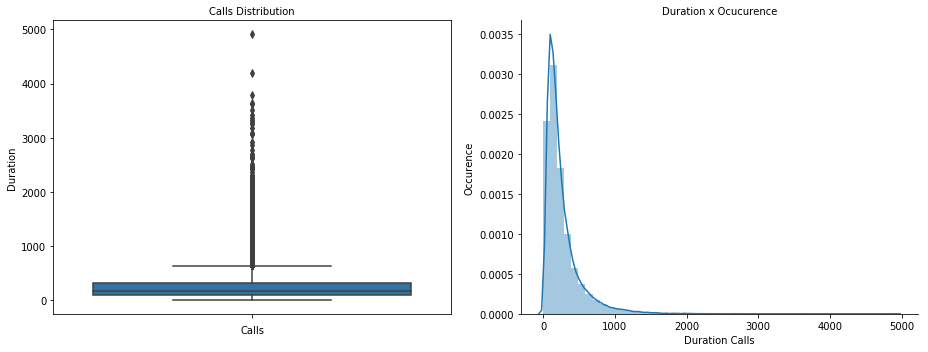

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_campaign, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_campaign['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [28]:
print("Max duration  call in minutes:  ", round((bank_campaign['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_campaign['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_campaign['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_campaign['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [29]:
print('Numerber of outliers: ', bank_campaign[bank_campaign['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_campaign))
#Outliers in %
print('Outliers are:', round(bank_campaign[bank_campaign['duration'] > 644.5]['duration'].count()*100/len(bank_campaign),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [30]:
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


# Contact, Month, Day of Week

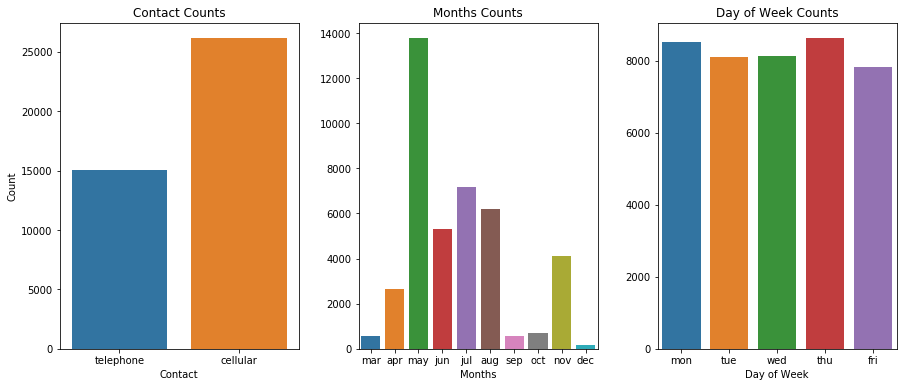

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_campaign['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_campaign['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_campaign['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [32]:
print('Ages above: ', bank_campaign['duration'].quantile(q = 0.75) + 
                      1.5*(bank_campaign['duration'].quantile(q = 0.75) - bank_campaign['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [33]:
bank_campaign[bank_campaign['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

# Contact, Month, Day of Week treatment

In [34]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_campaign['contact']     = labelencoder_X.fit_transform(bank_campaign['contact']) 
bank_campaign['month']       = labelencoder_X.fit_transform(bank_campaign['month']) 
bank_campaign['day_of_week'] = labelencoder_X.fit_transform(bank_campaign['day_of_week']) 

In [35]:
bank_campaign.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


# Social and economic context attributes

In [36]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# Other attributes

In [37]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [38]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [39]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [40]:
bank_final= pd.concat([bank_client, bank_campaign, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [42]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,3,5,1,6,0,2,0,0,7,4,968,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,2,7,1,5,1,0,0,1,4,0,103,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,0,3,1,1397,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,3,6,1,6,0,2,0,0,7,3,48,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,2,5,0,0,0,2,2,0,6,3,209,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Support Vector Machine

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

1. Linear 

In [45]:
svc_l= SVC(kernel = 'linear')
svc_l.fit(X_train, y_train)
svclpred = svc_l.predict(X_test)
print(confusion_matrix(y_test, svclpred))
print(round(accuracy_score(y_test, svclpred),2)*100)
SVCCV_Linear = (cross_val_score(svc_l, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6923  150]
 [ 644  283]]
90.0


2. Sigmoid Kernel

In [46]:
svc_s= SVC(kernel = 'sigmoid')
svc_s.fit(X_train, y_train)
svcspred = svc_s.predict(X_test)
print(confusion_matrix(y_test, svcspred))
print(round(accuracy_score(y_test, svcspred),2)*100)
SVCCV_Sigmoid = (cross_val_score(svc_s, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6526  547]
 [ 579  348]]
86.0


3. rbf Kernel

In [47]:
from sklearn.svm import SVC
svc_rbf= SVC(kernel = 'rbf')
svc_rbf.fit(X_train, y_train)
svcrbfpred = svc_rbf.predict(X_test)
print(confusion_matrix(y_test, svcrbfpred))
print(round(accuracy_score(y_test, svcrbfpred),2)*100)
SVCCV_rbf = (cross_val_score(svc_rbf, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6916  157]
 [ 585  342]]
91.0


In [48]:
models = pd.DataFrame({
                'Models': ['Support Vector Machine - Linear', 'Support Vector Machine - Sigmoid', 'Support Vector Machine - rbf' ],
                'Score':  [SVCCV_Linear, SVCCV_Sigmoid, SVCCV_rbf]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Support Vector Machine - rbf,0.911052
0,Support Vector Machine - Linear,0.903911
1,Support Vector Machine - Sigmoid,0.856153
